In [1]:
##importing libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
##Reading the data set
dataset_path ="C:\\Users\\mnkp9\\dataset"

In [4]:
for folder in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, folder)
    if os.path.isdir(class_path):
        print(f"Class: {folder}")
        images = os.listdir(class_path)
        print("First few images:", images[:5])

Class: Bear
First few images: ['bear_1.jpg', 'Bear_10.jpg', 'Bear_10_1.jpg', 'Bear_10_2.jpg', 'Bear_10_3.jpg']
Class: Bird
First few images: ['Bird_1.jpeg', 'Bird_10.jpeg', 'Bird_10_1.jpg', 'Bird_10_2.jpg', 'Bird_10_3.jpg']
Class: Cat
First few images: ['Cat_1.jpeg', 'Cat_10.jpg', 'Cat_10_1.jpg', 'Cat_10_2.jpg', 'Cat_10_3.jpg']
Class: Cow
First few images: ['Cow_1.jpg', 'Cow_10.jpeg', 'Cow_10_1.jpg', 'Cow_10_2.jpg', 'Cow_10_3.jpg']
Class: Deer
First few images: ['Deer_1.jpg', 'Deer_10.jpeg', 'Deer_10_1.jpg', 'Deer_10_2.jpg', 'Deer_10_3.jpg']
Class: Dog
First few images: ['Dog_1.jpeg', 'Dog_10.jpg', 'Dog_10_1.jpg', 'Dog_10_2.jpg', 'Dog_11.jpg']
Class: Dolphin
First few images: ['Dolphin_1.jpg', 'Dolphin_10.jpg', 'Dolphin_10_1.jpg', 'Dolphin_10_2.jpg', 'Dolphin_10_3.jpg']
Class: Elephant
First few images: ['Elephant_1.jpeg', 'Elephant_10.jpg', 'Elephant_10_1.jpg', 'Elephant_10_2.jpg', 'Elephant_10_3.jpg']
Class: Giraffe
First few images: ['Giraffe_1.jpeg', 'Giraffe_10.jpeg', 'Giraffe_10_

In [4]:
##Defining dataset properties
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [5]:
## Dataset preprosessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 1561 images belonging to 15 classes.
Found 383 images belonging to 15 classes.


In [7]:
##Training the dataset
model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),  # ✅ Recommended way to define input
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(15, activation='softmax')  # 15 classes
])

In [8]:
##Summarizing the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │           3,855 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,248,527 (84.87 MB)

 Trainable params: 22,248,527 (84.87 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
##Compiling the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [11]:
## Fitting the model
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.0863 - loss: 2.9682 - val_accuracy: 0.1775 - val_loss: 2.4959
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.2132 - loss: 2.4346 - val_accuracy: 0.2428 - val_loss: 2.2861
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.2878 - loss: 2.2089 - val_accuracy: 0.3081 - val_loss: 2.1336
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.3842 - loss: 1.9536 - val_accuracy: 0.3577 - val_loss: 2.1201
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.4552 - loss: 1.7290 - val_accuracy: 0.3786 - val_loss: 1.9855
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.4701 - loss: 1.6760 - val_accuracy: 0.3446 - val_loss: 2.2222
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.4892 - loss: 1.6390 - val_accuracy: 0.3995 - val_loss: 1.9968
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.5587 - loss: 1.3706 - val_accuracy: 0.3943 - val_loss:

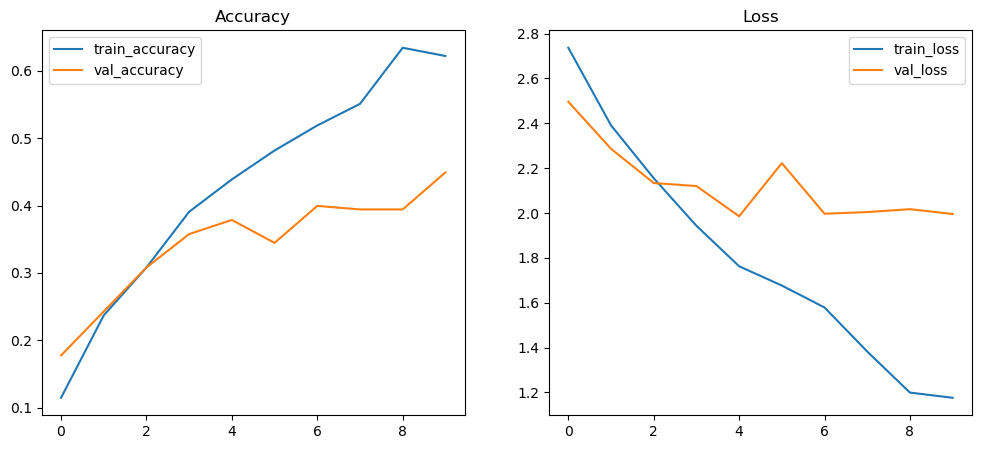

In [12]:
##Plotting the accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss')

plt.show()

In [13]:
## Printing classification report
val_data.reset()
Y_pred = model.predict(val_data)
y_pred = np.argmax(Y_pred, axis=1)

print("Classification Report:")
print(classification_report(val_data.classes, y_pred, target_names=val_data.class_indices.keys()))


12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 617ms/step
Classification Report:
              precision    recall  f1-score   support

        Bear       0.06      0.08      0.07        25
        Bird       0.05      0.04      0.04        27
         Cat       0.04      0.04      0.04        24
         Cow       0.06      0.04      0.05        26
        Deer       0.04      0.04      0.04        25
         Dog       0.00      0.00      0.00        24
     Dolphin       0.10      0.12      0.11        25
    Elephant       0.18      0.12      0.14        26
     Giraffe       0.09      0.12      0.10        25
       Horse       0.16      0.19      0.18        26
    Kangaroo       0.11      0.08      0.09        25
        Lion       0.10      0.12      0.11        26
       Panda       0.12      0.19      0.15        27
       Tiger       0.08      0.08      0.08        25
       Zebra       0.03      0.04      0.04        27

    accuracy                           0.09       383
   macro avg    

In [14]:
from tensorflow.keras.utils import load_img, img_to_array

In [16]:
def predict_image(img_path):
    img = load_img(img_path, target_size=IMG_SIZE)
    img_array = img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Make batch of 1

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    print(f"Predicted Class: {predicted_class}")
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis("off")
    plt.show()